<a href="https://colab.research.google.com/github/penkovgd/itmo-ml-course/blob/main/lab1_numpy_grad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Функции

##1.1

Постройте график функции и её производной первого порядка. Также найдите точки экстремума функции, отметьте их на графике другим цветом. Вычисления проведите вручную и приложите скрин расчетов.

$f(x) = (x^2-2x)ln(x)-1.5x^2+4x$

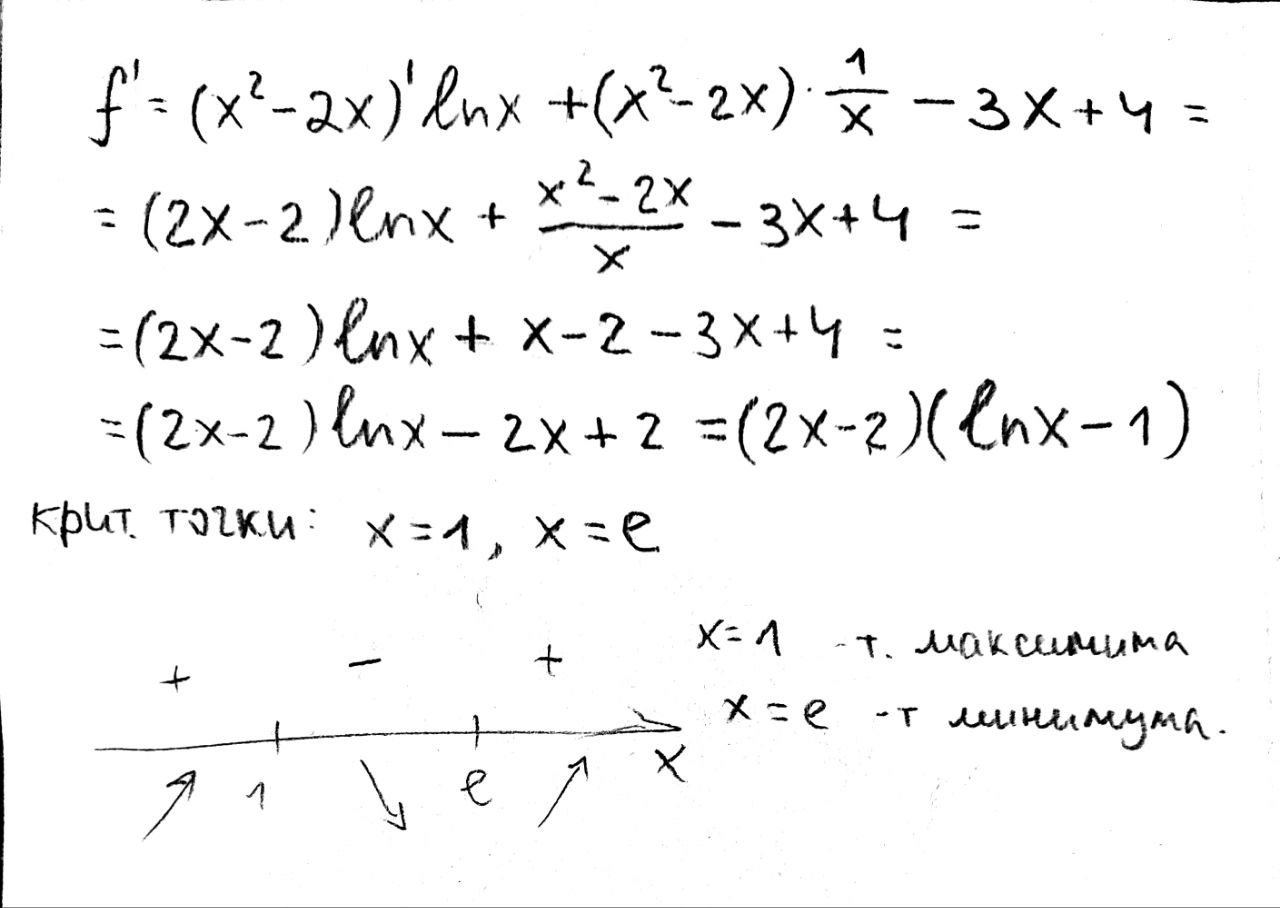

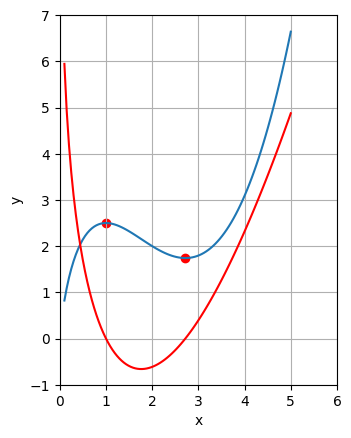

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def f(x):
  return (x**2 - 2*x) * np.log(x) - 1.5*x**2 + 4*x

def f_dx(x):
  return (2*x-2)*(np.log(x) - 1)


x_values = np.linspace(0.1, 5, 100)
y_values = f(x_values)
y_dx_values = f_dx(x_values)

fig, ax = plt.subplots()

ax.plot(x_values, y_values)
ax.plot(x_values, y_dx_values, color='red')

extrema_x = [1, np.e]
extrema_y = [f(1), f(np.e)]
plt.scatter(extrema_x, extrema_y, color='red')

ax.set_aspect('equal')
ax.set(xlim=(0,6), ylim=(-1,7), xlabel='x', ylabel='y')
plt.grid(True)
plt.show()

##1.2

Найдите частные производные функции $f(x, y, z) = 15x^2 + exp(x^2 + y^3)*cos(z)$ с помощью [SymPy](https://www.geeksforgeeks.org/python-sympy-diff-method/)

In [ ]:
from sympy import *
x, y, z = symbols('x y z')
f = 15*x**2 + exp(x**2 + y**3)*cos(z)

In [ ]:
diff(f, x) # df/dx

2*x*exp(x**2 + y**3)*cos(z) + 30*x

In [ ]:
diff(f, y) # df/dy

3*y**2*exp(x**2 + y**3)*cos(z)

In [ ]:
diff(f, z) # df/dz

-exp(x**2 + y**3)*sin(z)

##2

Не всегда значения функций возможно рассчитать напрямую, однако их можно вычислить приближенно, используя, например, ряды Тейлора. Реализуйте расчет $e^x$. Сравните значения, получаемые с различной точностью приближения (5, 10, 15), с numpy-реализацией. Постройте график, отобразив на нём все четыре линии.

In [ ]:
from math import factorial

x = np.linspace(-10, 10, 100)
y = np.zeros(len(x))
terms_n = [5, 10, 15]

fig, ax = plt.subplots()
for n in terms_n:
    for i in range(n):
        tailor_term = (x**i)/(factorial(i))
        y = np.add(y, tailor_term)
    ax.plot(x,y, label=n)

ax.plot(x, np.exp(x), label='np.exp()')
# ax.set(xlim=(-10,10), ylim=(-10,10), xlabel='x', ylabel='y')
# ax.set_aspect('equal')
plt.grid(True)
ax.legend()
plt.show()

NameError: name 'np' is not defined

##3

Рассмотрите две следующие функции, часто использующиеся как функции потерь (то есть они помогают оценить качество предсказаний модели).

$MAE (Mean\ Absolute\ Error) = \frac{1}{n} \sum_{i=1}^{n} |y_i - \widehat{y}_i|$

$MSE (Mean\ Squared\ Error) = \frac{1}{n} \sum_{i=1}^{n} (y_i - \widehat{y}_i)^2$

Письменно ответьте на вопросы:

1. Какая проблема присуща MAE с точки зрения дифференцирования?

2. Если в качестве $\widehat{y}_i$ всегда будет предсказываться константное значение, каким оно должно быть, чтобы минимизировать значение каждой из функций?


---

1. При дифференцировании MAE нужно будет продифференицировать выражение: $|y-\hat{y}|$, которое не дифференцируемо в $y=\hat{y}$. Нужно будет делить на 2 случая при $y-\hat{y} < 0$ и $>0$ и раскрывать модуль.
2.1 Для минимизации $MAE = E|y-\hat{y}|$, где $\hat{y}=c-const$ нужно взять медиану $y$.
2.2 Для MSE нужно взять мат. ожидание $y$.

# Матрицы. Векторы

##1

Реализуйте следующие паттерны. Не используйте циклы! Все матрицы квадратные со стороной длины n. Примеры приведены для n=5.

1. Шахматная доска
```
[[0. 1. 0. 1. 0.]
 [1. 0. 1. 0. 1.]
 [0. 1. 0. 1. 0.]
 [1. 0. 1. 0. 1.]
 [0. 1. 0. 1. 0.]]
 ```
2. Полоса шириной 3 относительно главной диагонали
```
[[1. 1. 0. 0. 0.]
 [1. 1. 1. 0. 0.]
 [0. 1. 1. 1. 0.]
 [0. 0. 1. 1. 1.]
 [0. 0. 0. 1. 1.]]
 ```
3. Кайма из единиц
```
[[1. 1. 1. 1. 1.]
 [1. 0. 0. 0. 1.]
 [1. 0. 0. 0. 1.]
 [1. 0. 0. 0. 1.]
 [1. 1. 1. 1. 1.]]
 ```
4. Полосы
```
[[0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0.]]
 ```
5. Верхний треугольник
```
[[1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1.]
 [0. 0. 1. 1. 1.]
 [0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 1.]]
 ```


In [ ]:
def chessboard(n: int) -> np.array:
    def get_chess(i,j):
        return (i + j) % 2
    m = np.fromfunction(get_chess, (n,n))
    return m

chessboard(5)

array([[0., 1., 0., 1., 0.],
       [1., 0., 1., 0., 1.],
       [0., 1., 0., 1., 0.],
       [1., 0., 1., 0., 1.],
       [0., 1., 0., 1., 0.]])

In [ ]:
def strip_width_3(n: int) -> np.array:
    def make_strip(i,j):
        diff = np.abs(i-j)
        strip = np.where(diff <= 1, 1, 0)
        return strip
    m = np.fromfunction(make_strip, (n,n))
    return m

strip_width_3(5)

array([[1, 1, 0, 0, 0],
       [1, 1, 1, 0, 0],
       [0, 1, 1, 1, 0],
       [0, 0, 1, 1, 1],
       [0, 0, 0, 1, 1]])

In [ ]:
def border(n):
    m = np.zeros((n,n))
    m[0] = 1
    m[n-1] = 1
    m[:, 0] = 1
    m[:, n-1] = 1
    return m

border(5)

array([[1., 1., 1., 1., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 1., 1., 1., 1.]])

In [ ]:
def hstripes(n):
    m = np.ones((n,n))
    m[::2,:] = 0
    return m

hstripes(5)

array([[0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0.]])

In [ ]:
def upper_triangle(n):
    def get_triangle(i, j):
        diff = i-j
        return np.where(diff <= 0, 1, 0)
    return np.fromfunction(get_triangle, (n,n))
upper_triangle(5)

array([[1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1],
       [0, 0, 1, 1, 1],
       [0, 0, 0, 1, 1],
       [0, 0, 0, 0, 1]])

##2

Пусть дан вектор следующего вида. Преобразуйте его, чтобы получить две матрицы: первая должна содержать одинаковые значения column-wise (столбец целиком из нулей, столбец целиком из единиц и так далее), а вторая - row-wise. Не используйте циклы.

In [ ]:
n = 5
vector = np.hstack([[i for i in range(n)] for _ in range(n)])  # также существуют vstack и dstack
print(vector)

[0 1 2 3 4 0 1 2 3 4 0 1 2 3 4 0 1 2 3 4 0 1 2 3 4]


In [ ]:
same_column_wise = np.reshape(vector, (n,n))
same_column_wise

array([[0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4]])

In [ ]:
same_row_wise = same_column_wise.T
same_row_wise

array([[0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3],
       [4, 4, 4, 4, 4]])

# Теория вероятностей

##1

Постройте графики плотности распределений для следующих распределений:

* Биномиальное распределение
* Геометрическое распределение
* Равномерное распределение
* Нормальное распределение
* Логнормальное распределение

Параметры распределений выберите произвольно. Подумайте, какие явления в реальном мире подчиняются тому или иному распределению.

Отобразите также следующие статистические показатели: выборочное среднее, мода, медиана, стандартное отклонение.

In [ ]:
import seaborn as sns
from scipy import stats

### Биномиальное распределение
Распределение количества «успехов» в последовательности из n независимых случайных экспериментов, таких, что вероятность «успеха» в каждом из них постоянна и равна p.

Ему подчиняются ситуации из задач по теорверу: Бросание монеты, вероятность брака на заводе, и в общем ситуации, где есть последовательность "испытаний" у которых 2 исхода.

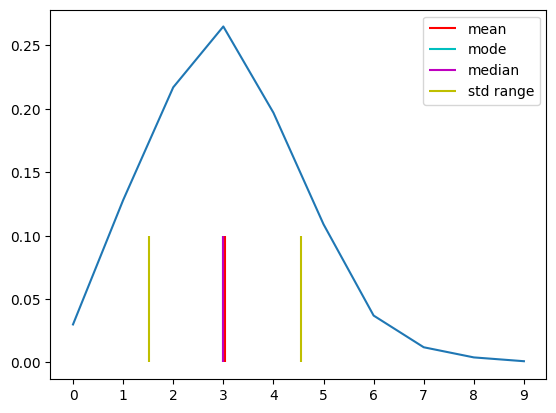

In [ ]:
n = 10 # кол-во испытаний Бернулли
p = 0.3 # вероятность удачи в испытании
samples = np.random.binomial(n=n,p=p,size=1000)
values, counts = np.unique(samples, return_counts=True)
probabilities = counts / counts.sum()

fig, ax = plt.subplots()
ax.plot(values, probabilities)
ax.set_xticks(np.arange(0,10,1))

mean = np.mean(samples)
ax.vlines(mean, ymin=0, ymax=0.1, color='r', label='mean')

mode = stats.mode(samples).mode
ax.vlines(mode, ymin=0, ymax=0.1, color='c', label='mode')

median = np.median(samples)
ax.vlines(median, ymin=0, ymax=0.1, color='m', label='median')

std = np.std(samples)
ax.vlines([mean+std, mean-std], ymin=0, ymax=0.1, color='y', label='std range')

plt.legend()
plt.show()

### Геометрическое распределение
число попыток испытаний Бернулли до появления "успеха" (вероятность успеха - p).
Пример: Geom(p=1/6) - колв-во бросков кубика до появления 6-ки.

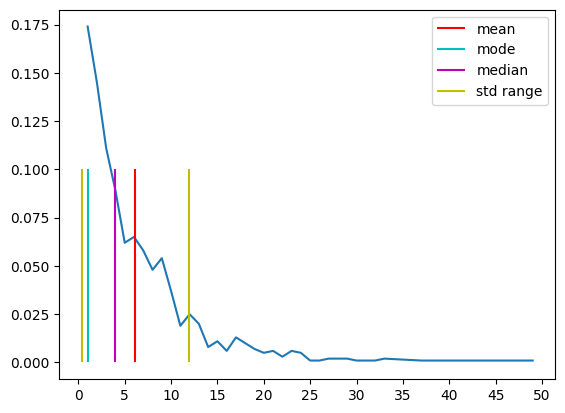

In [ ]:
p = 1/6 # вероятность успеха
samples = np.random.geometric(p=p, size=1000)
values, counts = np.unique(samples, return_counts=True)
probabilities = counts / counts.sum()

fig, ax = plt.subplots()
ax.plot(values, probabilities)
ax.set_xticks(np.arange(0,100,5))

mean = np.mean(samples)
ax.vlines(mean, ymin=0, ymax=0.1, color='r', label='mean')

mode = stats.mode(samples).mode
ax.vlines(mode, ymin=0, ymax=0.1, color='c', label='mode')

median = np.median(samples)
ax.vlines(median, ymin=0, ymax=0.1, color='m', label='median')

std = np.std(samples)
ax.vlines([mean+std, mean-std], ymin=0, ymax=0.1, color='y', label='std range')

plt.legend()
plt.show()

### Равномерное распределение
Бросок правильной монеты, кубика, генераторы случайных чисел

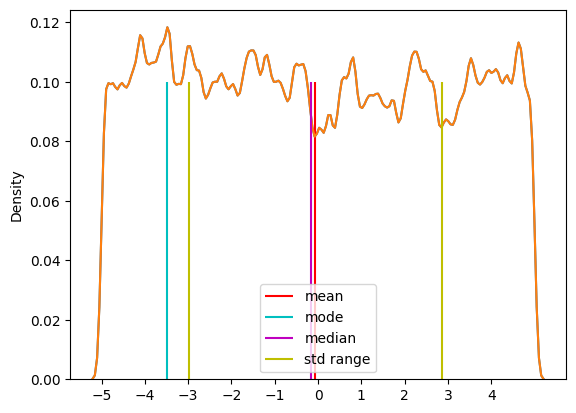

In [ ]:
samples = np.random.uniform(low=-5, high=5, size=10000)

fig, ax = plt.subplots()
sns.kdeplot(samples, ax=ax,bw_adjust=.15)
ax.set_xticks(np.arange(-5,5,1))

mean = np.mean(samples)
ax.vlines(mean, ymin=0, ymax=0.1, color='r', label='mean')

x, y = sns.kdeplot(samples, ax=ax,bw_adjust=.15).get_lines()[0].get_data()
mode = x[np.argmax(y)]
ax.vlines(mode, ymin=0, ymax=0.1, color='c', label='mode')

median = np.median(samples)
ax.vlines(median, ymin=0, ymax=0.1, color='m', label='median')

std = np.std(samples)
ax.vlines([mean+std, mean-std], ymin=0, ymax=0.1, color='y', label='std range')

plt.legend()
plt.show()

### Нормальное распределение
ЦПТ (суммы случайных величин), биология, погрешности измерений и многое другое

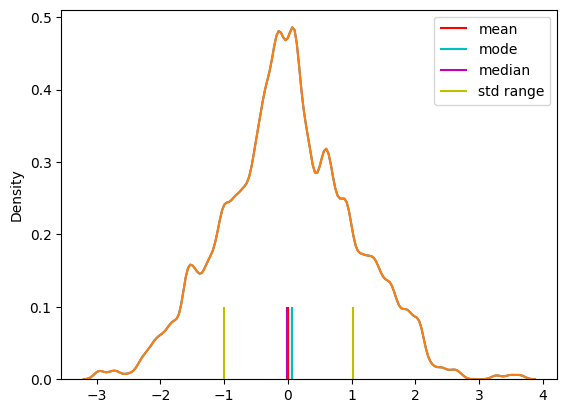

In [ ]:
samples = np.random.normal(loc=0, scale=1, size=1000)

fig, ax = plt.subplots()
sns.kdeplot(samples, ax=ax,bw_adjust=.3)
ax.set_xticks(np.arange(-5,5,1))

mean = np.mean(samples)
ax.vlines(mean, ymin=0, ymax=0.1, color='r', label='mean')

x, y = sns.kdeplot(samples, ax=ax,bw_adjust=.3).get_lines()[0].get_data()
mode = x[np.argmax(y)]
ax.vlines(mode, ymin=0, ymax=0.1, color='c', label='mode')

median = np.median(samples)
ax.vlines(median, ymin=0, ymax=0.1, color='m', label='median')

std = np.std(samples)
ax.vlines([mean+std, mean-std], ymin=0, ymax=0.1, color='y', label='std range')

plt.legend()
plt.show()

### Логнормальное распределение
Медицина - инкубационные периоды случаев какого-либо заболевания, Геология — концентрация редких элементов в горных породах, лингвистика — количество слов в предложениях.

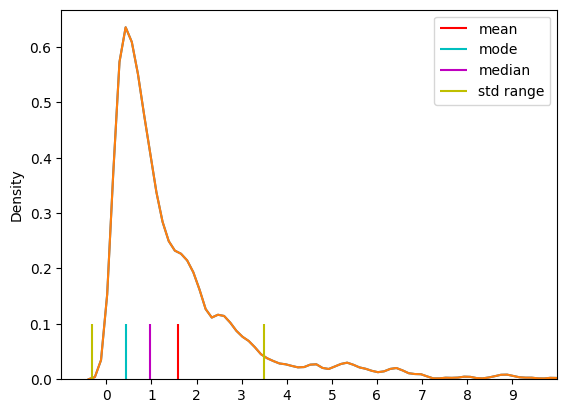

In [ ]:
samples = np.random.lognormal(mean=0, sigma=1, size=1000)

fig, ax = plt.subplots()
sns.kdeplot(samples, ax=ax,bw_adjust=.3)
ax.set_xticks(np.arange(0,10,1))
ax.set_xlim((-1,10))

mean = np.mean(samples)
ax.vlines(mean, ymin=0, ymax=0.1, color='r', label='mean')

x, y = sns.kdeplot(samples, ax=ax,bw_adjust=.3).get_lines()[0].get_data()
mode = x[np.argmax(y)]
ax.vlines(mode, ymin=0, ymax=0.1, color='c', label='mode')

median = np.median(samples)
ax.vlines(median, ymin=0, ymax=0.1, color='m', label='median')

std = np.std(samples)
ax.vlines([mean+std, mean-std], ymin=0, ymax=0.1, color='y', label='std range')

plt.legend()
plt.show()

Подумайте, в каких случаях медиана предпочтительнее среднего при расчете "средней температуры по больнице". Какие модификации можно было бы произвести для формулы среднего или для выборки, чтобы среднее значение стало более репрезентативно в подобных случаях? Напишите ответ.

Когда есть слишком большие значения в выборке (и в целом выбросы). Среднее зависит от этого значения, и будет завышенным, что возможно нам не не нужно. Медиана учитывает только наличие этого значения и будет более "средней".

Чтобы это исправить можно отбросить выбросы, логарифмировать значения выборки.

##2 (2 балла)

1000 человек бросают монетку. Каждый бросил 10 раз подряд.

 1. Какова вероятность того, что хотя бы у одного человека монетка выпала 10 раз подряд той же самой стороной (орлом или решкой)?
 2. Какова вероятность того, что хотя бы у одного человека монетка выпала 8 раз подряд той же самой стороной (орлом или решкой)?
 3. Какова вероятность того, что ровно у троих человек из 1000 монетка выпала 10 раз подряд той же самой стороной (орлом или решкой)?

 Рассчитайте вероятности, а также смоделируйте ситуацию и оцените эмпирическое распределение.

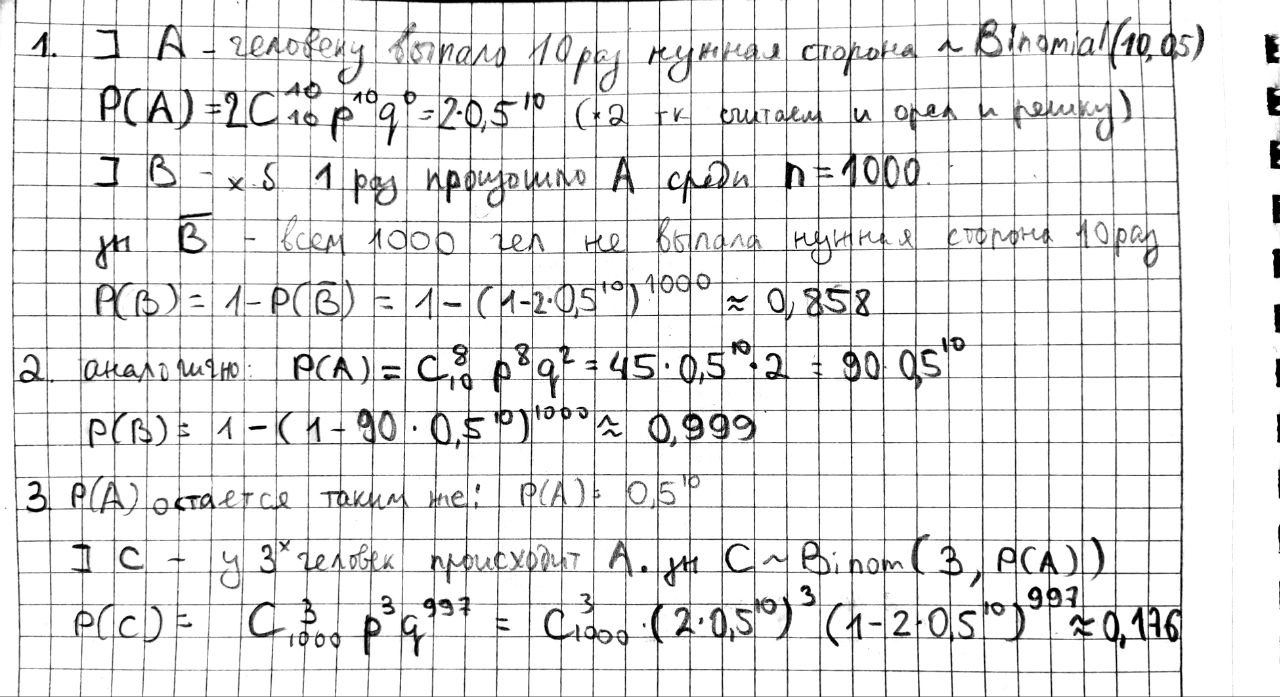

In [ ]:
n_samples = 10000
n_people = 1000
n_experiments = 10
p = 0.5

B_success = 0
for _ in range(n_samples):
    for i in range(n_people):
        n_successes = np.random.binomial(n=n_experiments, p=p, size=1)
        if n_successes == 10 or n_successes == 0:
            B_success += 1
            break
prob = B_success / n_samples
print(prob)

0.8589


In [ ]:
n_samples = 10000
n_people = 1000
n_experiments = 10
p = 0.5

B_success = 0
for _ in range(n_samples):
    for i in range(n_people):
        n_successes = np.random.binomial(n=n_experiments, p=p, size=1)
        if n_successes == 8 or n_successes == 2:
            B_success += 1
            break
prob = B_success / n_samples
print(prob)

1.0


In [ ]:
n_samples = 10000
n_people = 1000
n_experiments = 10
p = 0.5

C_success = 0 # кол-во раз, когда у трех человек из 1000 происходит A
for _ in range(n_samples):
    A_success = 0 # кол-во раз, когда у человека падает 10 одинаковых монет
    for i in range(n_people):
        n_successes = np.random.binomial(n=n_experiments, p=p, size=1)
        if n_successes == 10 or n_successes == 0: # выпало либо 10 орлов, либо 10 решек
            A_success += 1
    if A_success == 3:
        C_success += 1

prob = C_success / n_samples
print(prob)

0.1802


##3 (2 балла)

В магазин поступила новая продукция с трех предприятий. Процентный состав этой продукции следующий: 20% - продукция первого предприятия, 30% - продукция второго предприятия, 50% - продукция третьего предприятия; далее, 10% продукции первого предприятия высшего сорта, на втором предприятии - 5% и на третьем - 20% продукции высшего сорта. Найти вероятность того, что случайно купленная новая продукция окажется высшего сорта. Если известно, что купленная продукция высшего сорта, какова вероятность, что она была куплена на втором предприятии?

Решите задачу в общем случае для N предприятий, где доля продукции каждого составляет $a_i$, а доля продукции высшего сорта на каждом составляет $b_i$. Напишите функцию, принимающую на вход два списка: a и b, а также n - номер предприятия, для которого необходимо узнать вероятность, что продукция высшего сорта была куплена именно на нём (нумерация с единицы). Функция должна возвращать две вероятности.

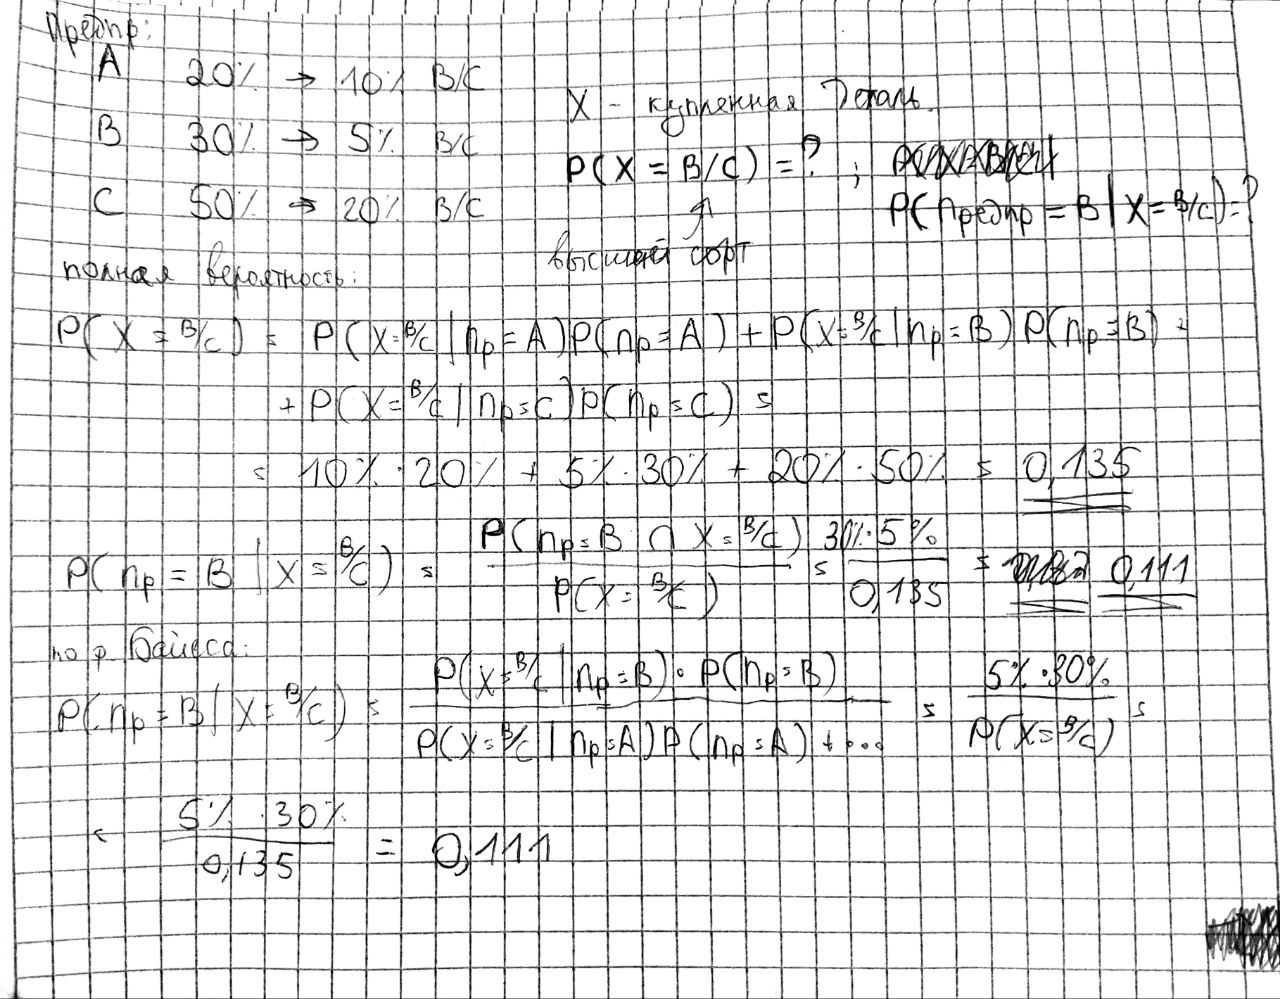

In [ ]:
a = [0.2, 0.3, 0.5] # доля продукции от каждого из предприятий
b = [0.1, 0.05, 0.2] # доля высокосортовой продукции P(X=в/с|Пр.=a_i)
n = 2 # предприятие B

def find_p1_p2(a, b, n):
    n -= 1
    N = len(a)
    p1 = np.sum([a[i] * b[i] for i in range(N)]) # P(X=в/с)
    p2 = (b[n] * a[n]) / p1 # P(Пр.=n|X=в/с)

    print(f'Вероятность того, что случайно купленная новая продукция окажется высшего сорта: {p1}')
    print(f'Вероятность того, что продукция была куплена на предприятии {n}, если известно, что она высшего сорта: {p2:.3f}')

find_p1_p2(a, b, 2)

Вероятность того, что случайно купленная новая продукция окажется высшего сорта: 0.135
Вероятность того, что продукция была куплена на предприятии 1, если известно, что она высшего сорта: 0.111


# Методы оптимизации (3 балла)



(Задание взято у Яндекса)

Дана функция $f(x) = (a\sin(x) + b\ln(x))^2 + cx^2$ и файл, содержащий пары (x, f(x)). Необходимо с точностью до трёх знаков после запятой подобрать коэффициенты a, b, c исходной функции. Для решения задачи предлагается использовать градиентный спуск и функцию потерь MSE.

P.S. на предоставленном наборе данных возможно получить MSE < 0.00001, ориентируйтесь на эту цифру.

In [ ]:
!gdown 1P5REbDVMtoHk_EPOaXzFWym2sMKhhbg3

Downloading...
From: https://drive.google.com/uc?id=1P5REbDVMtoHk_EPOaXzFWym2sMKhhbg3
To: /content/data.txt
100% 27.0k/27.0k [00:00<00:00, 48.4MB/s]


In [ ]:
with open('data.txt', 'r') as file:
    x_data = []
    y_data = []
    for para in eval(file.read()):
        x_data.append(para[0])
        y_data.append(para[1])
x_data = np.array(x_data)
y_data = np.array(y_data)

Итерация 0, MSE: 1854.5421716008398, Параметры: [0.2296467  0.42432024 0.98808182]
Итерация 25, MSE: 71.34167884794108, Параметры: [1.0571846  2.67362449 3.97287686]
Итерация 50, MSE: 18.989828459903393, Параметры: [2.16816916 2.76987352 3.96308756]
Итерация 75, MSE: 3.133811284215078, Параметры: [2.7668745  2.74965479 3.99055281]
Итерация 100, MSE: 0.4015817352528065, Параметры: [3.01027382 2.73104683 3.99781894]
Итерация 125, MSE: 0.04665569263532978, Параметры: [3.0971825  2.72287353 3.99940639]
Итерация 150, MSE: 0.005238223544350037, Параметры: [3.12676771 2.71989996 3.99980154]
Итерация 175, MSE: 0.0005813691370466999, Параметры: [3.1366762  2.71888204 3.9999162 ]
Итерация 200, MSE: 6.427567117640474e-05, Параметры: [3.13997663 2.71854051 3.99995237]


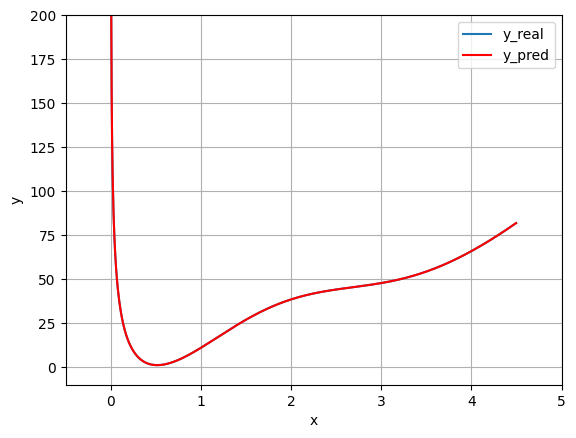

In [ ]:
# функция, которую мы будем приближать к f_real (y_data), изменяя параметры a,b,c (вектор параметров ABC)
def f_pred(x: np.array, ABC: np.array)-> np.array:
    return (ABC[0]*np.sin(x) + ABC[1]*np.log(x))**2 + ABC[2] * x**2

# целевая функция - MSE. Мы ее будем минимизировать.
# получается: a,b,c = argmin(MSE(y_real(x), y_pred(x,a,b,c)))
def get_mse(y_real: np.array, y_pred: np.array) -> float:
    return np.mean((y_real - y_pred)**2)

# градиент MSE
def get_mse_grad(x: np.array, y_real, y_pred, ABC: np.array) -> np.array:
    a, b, c = ABC

    # для удобства выделим частные производные f_pred по параметрам a,b,c
    dy_da = 2*(a*np.sin(x) + b*np.log(x))*np.sin(x)
    dy_db = 2*(a*np.sin(x) + b*np.log(x))*np.log(x)
    dy_dc = x**2

    n = len(x)
    # считаем частные производные MSE по a,b,c (математика приведена ниже)
    dmse_da = (-2/n) * np.sum((y_real-y_pred)*dy_da)
    dmse_db = (-2/n) * np.sum((y_real-y_pred)*dy_db)
    dmse_dc = (-2/n) * np.sum((y_real-y_pred)*dy_dc)

    mse_grad = np.array([dmse_da, dmse_db, dmse_dc])
    return mse_grad

def run_gradient_descent(epsilon=0.001, n_iter=1000, mse_stop=0.00001) -> np.array:
    # берем начальные значение параметров a,b,c
    ABC = np.random.random(size=3)
    for i in range(n_iter):
        # cчитаем y_pred
        y_pred = f_pred(x_data, ABC)

        # находим частные производные (градиент) целевой функции (MSE) по параметрам a,b,c
        mse_grad = get_mse_grad(x=x_data, y_real=y_data, y_pred=y_pred, ABC=ABC)

        # Оптимизируем a,b,c:
        ABC = ABC - epsilon * mse_grad

        # считаем MSE
        mse = get_mse(y_real=y_data, y_pred=y_pred)

        if i % 25 == 0:
            print(f"Итерация {i}, MSE: {mse}, Параметры: {ABC}")
        if mse <= mse_stop:
            break
    return ABC

optimized_ABC = run_gradient_descent()

fig, ax = plt.subplots()
ax.plot(x_data, y_data, label='y_real')
ax.plot(x_data, f_pred(x_data, optimized_ABC), label='y_pred', color='r')

ax.set(xlim=(-0.5,5), ylim=(-10,200), xlabel='x', ylabel='y')
plt.grid(True)
plt.legend()
plt.show()

Градиент для MSE по параметрам a,b,c получился следующим образом (пример для параметра a):


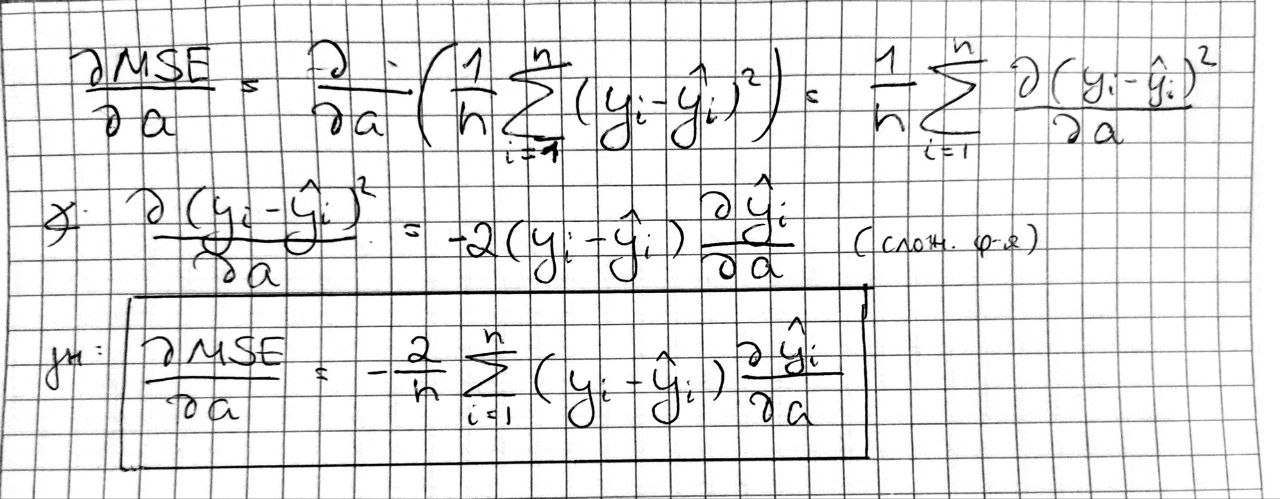